In [1]:
import params
import curveTreeDB
from google.cloud import datastore, storage, logging
import time
import pickle

In [2]:
def getDiscoveredPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.discoveredPortfolios)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [22]:
portfolios = getDiscoveredPortfolios()

In [23]:
len(portfolios)

76

In [24]:
import pandas as pd
cleanedModels = []
for item in portfolios:
    try:
        print(item["IS_profitability"])
    except:
        continue
    if item["IS_annualizedVolatility"] > 0.11:
        continue
#     if item["IS_profitability"] < 0.55:
#         continue
#     if item["portfolioType"].startswith("HRP") == False:
#         continue
#     if item["ALGORITHMS TRADED"] < 500:
#         continue
    newItem = {}
    for key in item:
        newItem[key] = item[key]
    
    itemKeys= list(newItem.keys())
    tickers = []
    for key in itemKeys:
        
        if (key.startswith("OOS") and key != "OOS_profitability" and key != "OOS_annualizedReturn" \
            and key != "OOS_free return" and key != "OOS_annualizedVolatility" and key != "OOS_beta"):
            del newItem[key]
        if len(key) == 3 or key == "SOXX" or key == "benchmark" or key == "IS_benchmark":
            del newItem[key]
            if len(key) == 3 or key == "SOXX":
                tickers.append(key)
    newItem["key"] = item.key.name
    newItem["tickers"] = tickers
    cleanedModels.append(newItem)


0.5467667436489607
0.5649081209247184
0.5467667436489607
0.5444572748267898
0.5525404157043879
0.5515463917525774
0.5624249699879952
0.5553202752779248
0.5554272517321016
0.563615428900403
0.5554272517321016
0.5600461893764435
0.5583140877598153
0.5634458672875436
0.5577367205542725
0.5538284398388025
0.5436739015352038
0.5508083140877598
0.5626410835214447
0.5508083140877598
0.549343981745579
0.5538373424971363
0.5605355064027939
0.5611428571428572
0.544151376146789
0.5525404157043879
0.5536951501154734
0.5467263570229435
0.5601825442099259
0.5582857142857143
0.5531177829099307
0.5513856812933026
0.5576251455180442
0.5525404157043879
0.5542725173210161
0.5545505935556811
0.5450346420323325
0.5583140877598153
0.558891454965358
0.5669383003492433
0.5548498845265589
0.5646100116414435
0.5492227979274611
0.5622022233986236
0.5598870056497175
0.5606235565819861
0.5542725173210161
0.5594688221709007
0.5513856812933026
0.5549828178694158
0.5544041450777202
0.5490762124711316
0.548
0.55210132

In [19]:
cleanedModels[0]


{'ALGORITHMS TRADED': 198,
 'IS_alpha': 0.07125516688146344,
 'IS_annualizedReturn': 0.12742840935278688,
 'IS_annualizedVolatility': 0.10128681308486179,
 'IS_beta': 0.3340045251350192,
 'IS_free return': 0.026141596267925088,
 'IS_monthlyMinimum': -0.09518859602130969,
 'IS_profitability': 0.5436739015352038,
 'IS_rollingSharpeError': 1.124849954651541,
 'IS_rollingSharpeMinimum': -0.22220643288299033,
 'IS_sharpe': 1.2350389268911126,
 'IS_sharpe difference': 0.7763393831737031,
 'IS_stability': 0.9654870755994219,
 'IS_weeklyMinimum': -0.08095458155542168,
 'IS_yearlyMinimum': -0.07128101246463381,
 'OOS_annualizedReturn': 0.23623777095736598,
 'OOS_annualizedVolatility': 0.11326850842577044,
 'OOS_beta': 0.9504165754978237,
 'OOS_free return': 0.12296926253159554,
 'OOS_profitability': 0.5634920634920635,
 'TICKERS TRADED': 8,
 'description': 'AUTO GENERATED',
 'key': '42c5553e7cc9f4aaf30ff720fc9e8f9150491fbe3cb73b6e7542e5d2',
 'portfolioType': 'EW',
 'startedTrading': datetime.da

ALGORITHMS TRADED
512    0.571429
529    0.551587
535    0.563492
542    0.555556
552    0.575397
576    0.563492
593    0.559524
594    0.543651
615    0.563492
620    0.551587
621    0.559524
642    0.551587
680    0.555556
682    0.563492
697    0.563492
698    0.559524
700    0.563492
Name: OOS_profitability, dtype: float64
ALGORITHMS TRADED
512    0.158254
529    0.116972
535    0.225163
542    0.132448
552    0.217865
576    0.198179
593    0.216849
594    0.200766
615    0.208217
620    0.225113
621    0.185473
642    0.203656
680    0.180061
682    0.197652
697    0.169809
698    0.177534
700    0.201945
Name: OOS_annualizedReturn, dtype: float64
ALGORITHMS TRADED
512    0.028873
529    0.013854
535    0.106120
542    0.029580
552    0.104052
576    0.082518
593    0.084827
594    0.063264
615    0.084371
620    0.090855
621    0.075031
642    0.072770
680    0.072287
682    0.070805
697    0.064930
698    0.071387
700    0.076690
Name: OOS_free return, dtype: float64
ALGORITHM

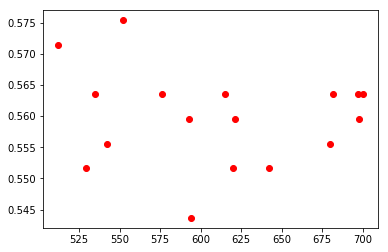

ALGORITHMS TRADED OOS_annualizedReturn


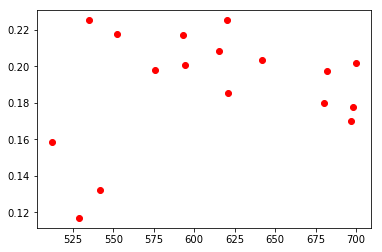

ALGORITHMS TRADED OOS_free return


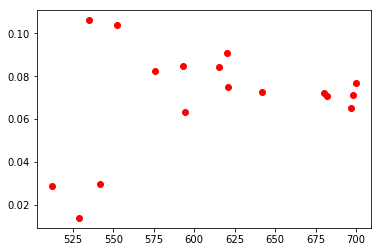

IS_alpha
0.103512    0.555556
0.105817    0.551587
0.116903    0.563492
0.119221    0.571429
0.119334    0.563492
0.124244    0.559524
0.124622    0.551587
0.129158    0.563492
0.130730    0.563492
0.131164    0.555556
0.132368    0.563492
0.133495    0.543651
0.133801    0.551587
0.138643    0.559524
0.140464    0.575397
0.151608    0.563492
0.152794    0.559524
Name: OOS_profitability, dtype: float64
IS_alpha
0.103512    0.132448
0.105817    0.116972
0.116903    0.201945
0.119221    0.158254
0.119334    0.169809
0.124244    0.177534
0.124622    0.225113
0.129158    0.197652
0.130730    0.208217
0.131164    0.180061
0.132368    0.198179
0.133495    0.200766
0.133801    0.203656
0.138643    0.216849
0.140464    0.217865
0.151608    0.225163
0.152794    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_alpha
0.103512    0.029580
0.105817    0.013854
0.116903    0.076690
0.119221    0.028873
0.119334    0.064930
0.124244    0.071387
0.124622    0.090855
0.129158    0.070805
0.130730

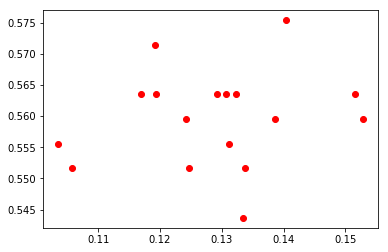

IS_alpha OOS_annualizedReturn
IS_annualizedReturn
0.220674    0.555556
0.224766    0.551587
0.238670    0.563492
0.240175    0.571429
0.242354    0.563492
0.247312    0.559524
0.251017    0.551587
0.251577    0.563492
0.252751    0.563492
0.254422    0.555556
0.259533    0.551587
0.261805    0.563492
0.263046    0.559524
0.263663    0.575397
0.266065    0.543651
0.275332    0.563492
0.280640    0.559524
Name: OOS_profitability, dtype: float64
IS_annualizedReturn
0.220674    0.132448
0.224766    0.116972
0.238670    0.201945
0.240175    0.158254
0.242354    0.169809
0.247312    0.177534
0.251017    0.225113
0.251577    0.208217
0.252751    0.197652
0.254422    0.180061
0.259533    0.203656
0.261805    0.198179
0.263046    0.216849
0.263663    0.217865
0.266065    0.200766
0.275332    0.225163
0.280640    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_annualizedReturn
0.220674    0.029580
0.224766    0.013854
0.238670    0.076690
0.240175    0.028873
0.242354    0.064930
0.247312

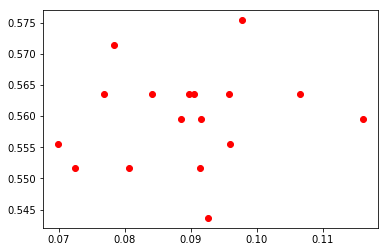

IS_free return OOS_annualizedReturn


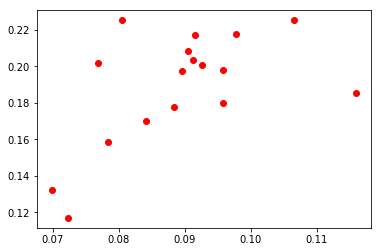

IS_free return OOS_free return


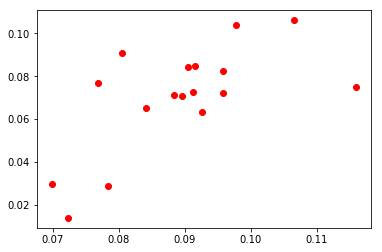

IS_monthlyMinimum
-0.165898    0.543651
-0.163520    0.571429
-0.160814    0.551587
-0.160522    0.551587
-0.157088    0.559524
-0.152218    0.563492
-0.151618    0.563492
-0.149418    0.563492
-0.143143    0.563492
-0.136007    0.559524
-0.135710    0.575397
-0.135377    0.563492
-0.131127    0.551587
-0.129083    0.559524
-0.126587    0.555556
-0.126465    0.555556
-0.125434    0.563492
Name: OOS_profitability, dtype: float64
IS_monthlyMinimum
-0.165898    0.200766
-0.163520    0.158254
-0.160814    0.225113
-0.160522    0.203656
-0.157088    0.216849
-0.152218    0.197652
-0.151618    0.208217
-0.149418    0.201945
-0.143143    0.225163
-0.136007    0.185473
-0.135710    0.217865
-0.135377    0.198179
-0.131127    0.116972
-0.129083    0.177534
-0.126587    0.180061
-0.126465    0.132448
-0.125434    0.169809
Name: OOS_annualizedReturn, dtype: float64
IS_monthlyMinimum
-0.165898    0.063264
-0.163520    0.028873
-0.160814    0.090855
-0.160522    0.072770
-0.157088    0.084827
-0.15

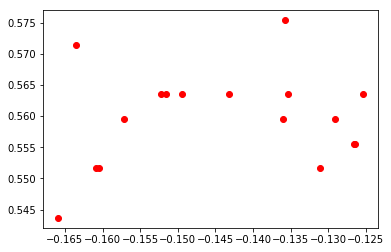

IS_monthlyMinimum OOS_annualizedReturn


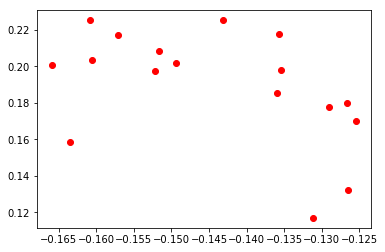

IS_monthlyMinimum OOS_free return


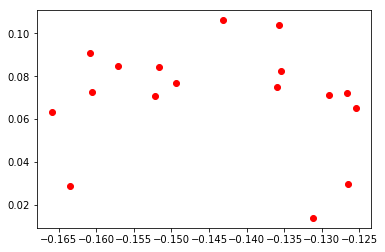

IS_profitability
0.550808    0.561508
0.551386    0.557540
0.552540    0.555556
0.553118    0.575397
0.553695    0.551587
0.553828    0.563492
0.554850    0.563492
0.555427    0.557540
0.555556    0.543651
0.557737    0.563492
0.558286    0.571429
0.559469    0.563492
Name: OOS_profitability, dtype: float64
IS_profitability
0.550808    0.187856
0.551386    0.174649
0.552540    0.199526
0.553118    0.217865
0.553695    0.116972
0.553828    0.225163
0.554850    0.197652
0.555427    0.182767
0.555556    0.200766
0.557737    0.201945
0.558286    0.158254
0.559469    0.208217
Name: OOS_annualizedReturn, dtype: float64
IS_profitability
0.550808    0.076952
0.551386    0.057203
0.552540    0.076185
0.553118    0.104052
0.553695    0.013854
0.553828    0.106120
0.554850    0.070805
0.555427    0.073659
0.555556    0.063264
0.557737    0.076690
0.558286    0.028873
0.559469    0.084371
Name: OOS_free return, dtype: float64
IS_profitability OOS_profitability


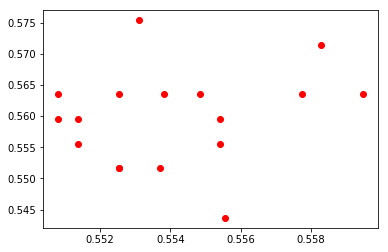

IS_profitability OOS_annualizedReturn


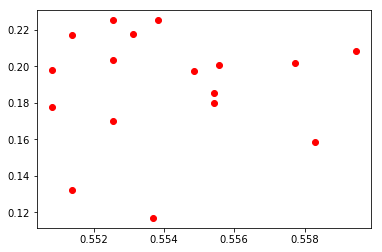

IS_profitability OOS_free return


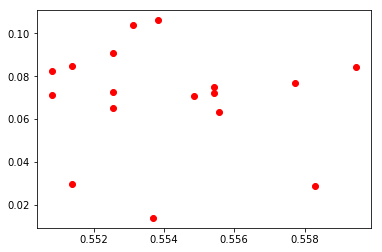

IS_rollingSharpeError
0.792367    0.551587
0.806715    0.571429
0.817056    0.555556
0.869955    0.543651
0.878200    0.563492
0.880162    0.559524
0.886271    0.563492
0.895567    0.563492
0.910469    0.551587
0.910576    0.551587
0.917063    0.563492
0.924763    0.555556
0.925579    0.559524
0.932001    0.563492
0.949477    0.575397
0.977837    0.559524
1.044770    0.563492
Name: OOS_profitability, dtype: float64
IS_rollingSharpeError
0.792367    0.116972
0.806715    0.158254
0.817056    0.132448
0.869955    0.200766
0.878200    0.201945
0.880162    0.216849
0.886271    0.169809
0.895567    0.198179
0.910469    0.203656
0.910576    0.225113
0.917063    0.197652
0.924763    0.180061
0.925579    0.177534
0.932001    0.208217
0.949477    0.217865
0.977837    0.185473
1.044770    0.225163
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeError
0.792367    0.013854
0.806715    0.028873
0.817056    0.029580
0.869955    0.063264
0.878200    0.076690
0.880162    0.084827
0.886271   

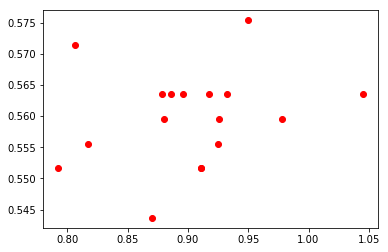

IS_rollingSharpeError OOS_annualizedReturn


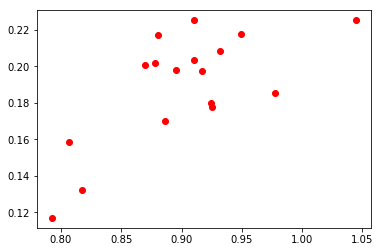

IS_rollingSharpeError OOS_free return


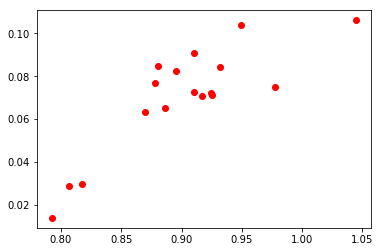

IS_rollingSharpeMinimum
-0.685891    0.571429
-0.650730    0.559524
-0.645785    0.551587
-0.638902    0.551587
-0.634817    0.563492
-0.632521    0.551587
-0.628655    0.575397
-0.625600    0.563492
-0.625207    0.543651
-0.622206    0.563492
-0.616265    0.563492
-0.610780    0.555556
-0.609897    0.555556
-0.593757    0.563492
-0.590746    0.559524
-0.579234    0.559524
-0.570420    0.563492
Name: OOS_profitability, dtype: float64
IS_rollingSharpeMinimum
-0.685891    0.158254
-0.650730    0.216849
-0.645785    0.225113
-0.638902    0.203656
-0.634817    0.208217
-0.632521    0.116972
-0.628655    0.217865
-0.625600    0.197652
-0.625207    0.200766
-0.622206    0.225163
-0.616265    0.201945
-0.610780    0.180061
-0.609897    0.132448
-0.593757    0.198179
-0.590746    0.185473
-0.579234    0.177534
-0.570420    0.169809
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeMinimum
-0.685891    0.028873
-0.650730    0.084827
-0.645785    0.090855
-0.638902    0.072770
-0.634817

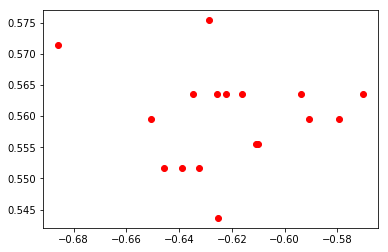

IS_rollingSharpeMinimum OOS_annualizedReturn


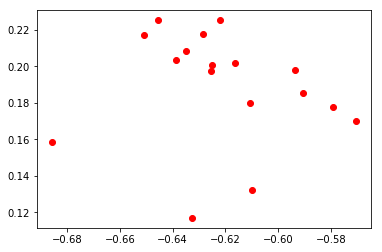

IS_rollingSharpeMinimum OOS_free return


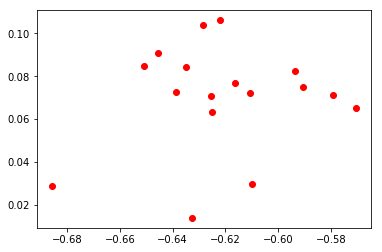

IS_sharpe
1.398183    0.555556
1.399707    0.551587
1.404384    0.563492
1.407378    0.551587
1.411819    0.571429
1.447185    0.543651
1.447991    0.559524
1.451016    0.563492
1.456449    0.551587
1.463694    0.563492
1.471141    0.559524
1.474115    0.563492
1.484649    0.563492
1.494211    0.575397
1.509351    0.555556
1.526241    0.563492
1.585464    0.559524
Name: OOS_profitability, dtype: float64
IS_sharpe
1.398183    0.132448
1.399707    0.225113
1.404384    0.201945
1.407378    0.116972
1.411819    0.158254
1.447185    0.200766
1.447991    0.216849
1.451016    0.169809
1.456449    0.203656
1.463694    0.197652
1.471141    0.177534
1.474115    0.208217
1.484649    0.198179
1.494211    0.217865
1.509351    0.180061
1.526241    0.225163
1.585464    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_sharpe
1.398183    0.029580
1.399707    0.090855
1.404384    0.076690
1.407378    0.013854
1.411819    0.028873
1.447185    0.063264
1.447991    0.084827
1.451016    0.064930
1.456

/Users/patrickogrady/anaconda3/lib/python3.6/site-packages/matplotlib/axis.py:1045: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


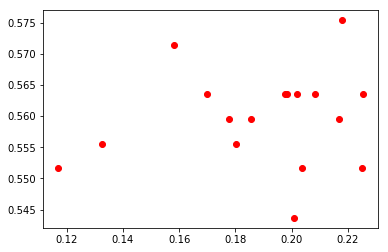

OOS_annualizedReturn OOS_annualizedReturn
OOS_annualizedVolatility
0.102869    0.555556
0.103119    0.551587
0.104880    0.563492
0.106147    0.559524
0.107774    0.555556
0.110442    0.559524
0.113813    0.575397
0.115661    0.563492
0.119043    0.563492
0.123846    0.563492
0.125256    0.563492
0.126847    0.563492
0.129381    0.571429
0.130886    0.551587
0.132023    0.559524
0.134257    0.551587
0.137502    0.543651
Name: OOS_profitability, dtype: float64
OOS_annualizedVolatility
0.102869    0.132448
0.103119    0.116972
0.104880    0.169809
0.106147    0.177534
0.107774    0.180061
0.110442    0.185473
0.113813    0.217865
0.115661    0.198179
0.119043    0.225163
0.123846    0.208217
0.125256    0.201945
0.126847    0.197652
0.129381    0.158254
0.130886    0.203656
0.132023    0.216849
0.134257    0.225113
0.137502    0.200766
Name: OOS_annualizedReturn, dtype: float64
OOS_annualizedVolatility
0.102869    0.029580
0.103119    0.013854
0.104880    0.064930
0.106147    0.071387
0.

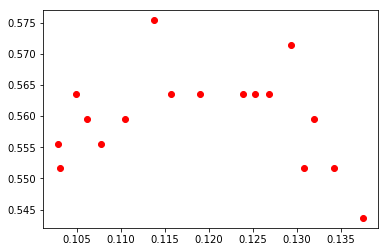

OOS_annualizedVolatility OOS_annualizedReturn


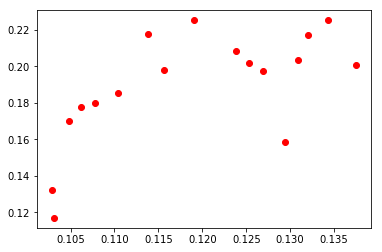

OOS_annualizedVolatility OOS_free return


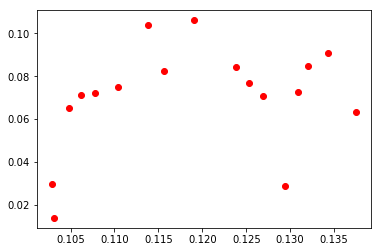

OOS_beta
1.122285    0.551587
1.125766    0.555556
1.150240    0.563492
1.166352    0.559524
1.179730    0.555556
1.186717    0.559524
1.210192    0.575397
1.219689    0.571429
1.229100    0.563492
1.246688    0.563492
1.252692    0.563492
1.256865    0.563492
1.264017    0.563492
1.285429    0.551587
1.289314    0.543651
1.323834    0.559524
1.331165    0.551587
Name: OOS_profitability, dtype: float64
OOS_beta
1.122285    0.116972
1.125766    0.132448
1.150240    0.169809
1.166352    0.177534
1.179730    0.180061
1.186717    0.185473
1.210192    0.217865
1.219689    0.158254
1.229100    0.198179
1.246688    0.208217
1.252692    0.225163
1.256865    0.201945
1.264017    0.197652
1.285429    0.203656
1.289314    0.200766
1.323834    0.216849
1.331165    0.225113
Name: OOS_annualizedReturn, dtype: float64
OOS_beta
1.122285    0.013854
1.125766    0.029580
1.150240    0.064930
1.166352    0.071387
1.179730    0.072287
1.186717    0.075031
1.210192    0.104052
1.219689    0.028873
1.229100

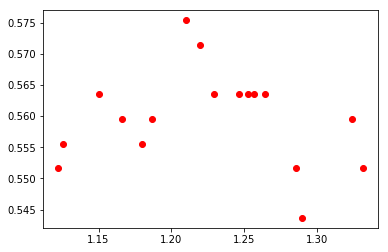

OOS_beta OOS_annualizedReturn
OOS_free return
0.013854    0.551587
0.028873    0.571429
0.029580    0.555556
0.063264    0.543651
0.064930    0.563492
0.070805    0.563492
0.071387    0.559524
0.072287    0.555556
0.072770    0.551587
0.075031    0.559524
0.076690    0.563492
0.082518    0.563492
0.084371    0.563492
0.084827    0.559524
0.090855    0.551587
0.104052    0.575397
0.106120    0.563492
Name: OOS_profitability, dtype: float64
OOS_free return
0.013854    0.116972
0.028873    0.158254
0.029580    0.132448
0.063264    0.200766
0.064930    0.169809
0.070805    0.197652
0.071387    0.177534
0.072287    0.180061
0.072770    0.203656
0.075031    0.185473
0.076690    0.201945
0.082518    0.198179
0.084371    0.208217
0.084827    0.216849
0.090855    0.225113
0.104052    0.217865
0.106120    0.225163
Name: OOS_annualizedReturn, dtype: float64
OOS_free return
0.013854    0.013854
0.028873    0.028873
0.029580    0.029580
0.063264    0.063264
0.064930    0.064930
0.070805    0.070805

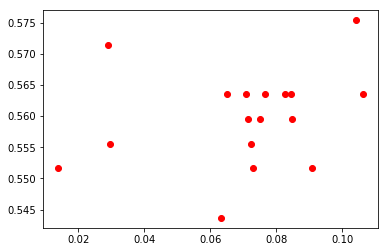

OOS_free return OOS_annualizedReturn


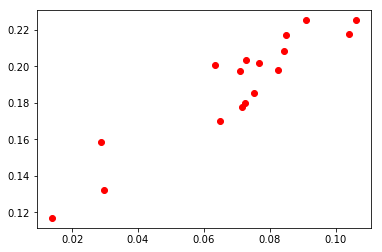

OOS_free return OOS_free return
OOS_profitability
0.543651    0.543651
0.551587    0.551587
0.555556    0.555556
0.559524    0.559524
0.563492    0.563492
0.571429    0.571429
0.575397    0.575397
Name: OOS_profitability, dtype: float64
OOS_profitability
0.543651    0.200766
0.551587    0.181914
0.555556    0.156255
0.559524    0.193285
0.563492    0.200161
0.571429    0.158254
0.575397    0.217865
Name: OOS_annualizedReturn, dtype: float64
OOS_profitability
0.543651    0.063264
0.551587    0.059160
0.555556    0.050933
0.559524    0.077081
0.563492    0.080906
0.571429    0.028873
0.575397    0.104052
Name: OOS_free return, dtype: float64
OOS_profitability OOS_profitability


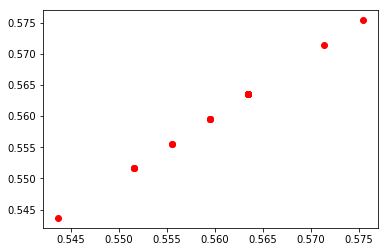

OOS_profitability OOS_annualizedReturn
TICKERS TRADED
21    0.563492
22    0.543651
23    0.559524
24    0.566138
27    0.571429
28    0.551587
31    0.551587
32    0.556878
33    0.563492
34    0.563492
35    0.557540
36    0.563492
Name: OOS_profitability, dtype: float64
TICKERS TRADED
21    0.225163
22    0.200766
23    0.185473
24    0.210964
27    0.158254
28    0.203656
31    0.225113
32    0.168417
33    0.169809
34    0.197652
35    0.154991
36    0.201945
Name: OOS_annualizedReturn, dtype: float64
TICKERS TRADED
21    0.106120
22    0.063264
23    0.075031
24    0.090466
27    0.028873
28    0.072770
31    0.090855
32    0.056837
33    0.064930
34    0.070805
35    0.050483
36    0.076690
Name: OOS_free return, dtype: float64
TICKERS TRADED OOS_profitability


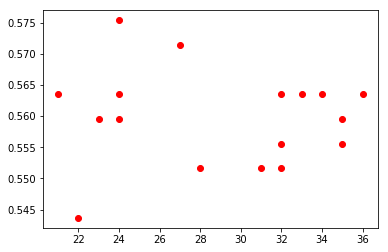

TICKERS TRADED OOS_annualizedReturn
VO
True    0.559807
Name: OOS_profitability, dtype: float64
VO
True    0.187984
Name: OOS_annualizedReturn, dtype: float64
VO
True    0.070997
Name: OOS_free return, dtype: float64
VO OOS_profitability


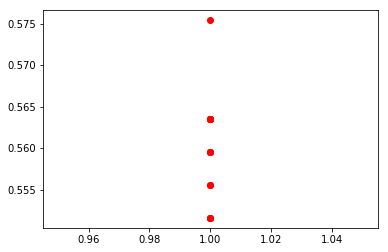

VO OOS_annualizedReturn
description
AUTO GENERATED    0.559757
Name: OOS_profitability, dtype: float64
description
AUTO GENERATED    0.189174
Name: OOS_annualizedReturn, dtype: float64
description
AUTO GENERATED    0.07013
Name: OOS_free return, dtype: float64
description OOS_profitability
key
161e7fc3d9e70151f270de94c613503f4a2d9d7d2ce46f424bb7137d    0.551587
220ddc0d0290adfaa6355ecb3ccabcf9725f43caa55b3fd4348caba9    0.555556
3129059dd600171cfc3a2cc840308cf2999a250463509a55797666b1    0.559524
3f9562ed92ee09f1eb6954502a04ce40bbf44e753696efce44d2a7c4    0.563492
41fde9ef513f9e05ecd2183e55cc4e44493dc5753a38a8481354a89d    0.563492
4376e578b8ec5a873c99bbdab301bbc0b7afe07936696c7cc22d52e4    0.559524
74220ebf03591ca750386c062f064cefdd0c10bee6d2d80e3220e2f8    0.563492
7424a5ed2594a1c4654c000f43d9c3bba056706664f1ead5d941b012    0.551587
7adb452e541924b1313f643bfdaeae10774efa5e06a2ef31b93d46df    0.575397
7dcfe2f73424a2d62902c8dc238704fc6839fefcb63bbe29e87bd93d    0.559524
84cf945a927a30d

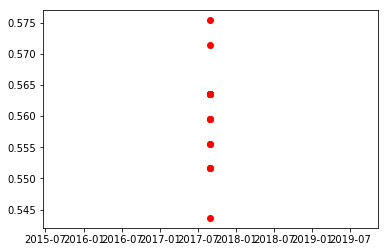

startedTrading OOS_annualizedReturn


In [14]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    if col == "tickers":
        continue
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_profitability"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_annualizedReturn"].mean()
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_free return"].mean()
            print(groupsSharpe)
            
        print(col, "OOS_profitability")
        xVals = cm[[col]].values
        yVals = cm[["OOS_profitability"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_annualizedReturn")
        xVals = cm[[col]].values
        yVals = cm[["OOS_annualizedReturn"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_free return")
        xVals = cm[[col]].values
        yVals = cm[["OOS_free return"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [8]:
import dataAck
tData = dataAck.getTrainingData(params.tickerDataLookup)
joinedData = tData[0]

ATTEMPTING PULL ALL_TICKERS


In [9]:
def getDiscoveredPortfolioData(portfolioKey):
    storageClient = storage.Client('money-maker-1236')
    while True:
        try:
            bucket = storageClient.get_bucket(params.discoveredPortfolioCache)
            print("ATTEMPTING PULL", portfolioKey)
            blob = storage.Blob(portfolioKey, bucket)
            return pickle.loads(blob.download_as_string())
        except:
            return None
    pass

In [10]:
import empyrical
import dataAck
import portfolioGeneration
def getLimitedDataForPortfolio(tickerAllocationsTable, joinedData, factorToTrade= "VTI"):
    
    rawTickerPerformance = portfolioGeneration.calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)
    
    rawTickerPerformance = rawTickerPerformance[~rawTickerPerformance.index.duplicated(keep='first')]
    

    rawAlgoPerformance = pd.DataFrame(rawTickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return Without Commissions"])

    tickerPerformance, algoPerformance, algoTransactionCost =  portfolioGeneration.calculatePerformanceForAllocations(tickerAllocationsTable, joinedData)

    benchmark = factorToTrade
    factorReturn = dataAck.getDailyFactorReturn(benchmark, joinedData)
    factorReturn.columns = ["Factor Return (" + benchmark + ")"]
    algoPerformance.columns = ["Algo Return"]
    
    algoPerformanceRollingWeekly = algoPerformance.rolling(5, min_periods=5).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingWeekly.columns = ["Weekly Rolling Performance"]
    
    algoPerformanceRollingMonthly = algoPerformance.rolling(22, min_periods=22).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingMonthly.columns = ["Monthly Rolling Performance"]
    
    algoPerformanceRollingYearly = algoPerformance.rolling(252, min_periods=252).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingYearly.columns = ["Yearly Rolling Performance"]
    
    
    
    
    return algoPerformance.join(factorReturn), algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly

EW By Ticker 598 26
IS 0.32300536991347867 0.5553202752779248 0.12009449324240995 0.0792355344887609
OOS 0.8031787837927569 0.5317460317460317 0.12080377257310637 0.07094944693813461
ATTEMPTING PULL 21851e5d66fa4dde728f125816648700e3154b36dc76d10ca9c3f2f0
Weekly -0.059638829083 0.00230017523157 0.0498151659463
Monthly -0.0631253680703 0.0101729623885 0.0791869692714
Yearly -0.0696902930178 0.115773554655 0.234512787539


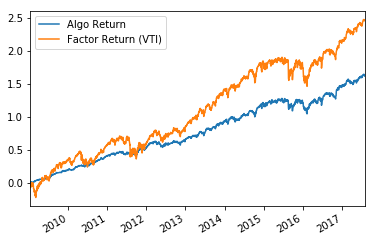

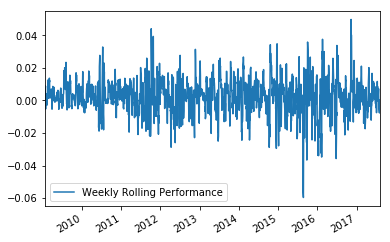

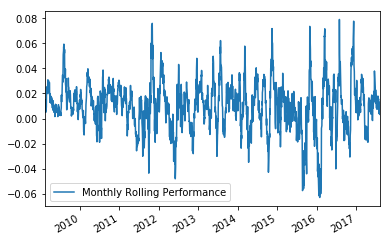

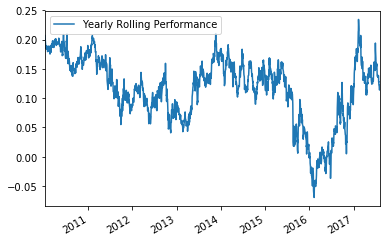

EW 198 8
IS 0.3340045251350192 0.5436739015352038 0.12742840935278688 0.10128681308486179
OOS 0.9504165754978237 0.5634920634920635 0.23623777095736598 0.11326850842577044
ATTEMPTING PULL 42c5553e7cc9f4aaf30ff720fc9e8f9150491fbe3cb73b6e7542e5d2
Weekly -0.0809545815554 0.00268134449639 0.0639293723131
Monthly -0.0951885960213 0.01187317837 0.1305301067
Yearly -0.0712810124646 0.141713329293 0.420861665667


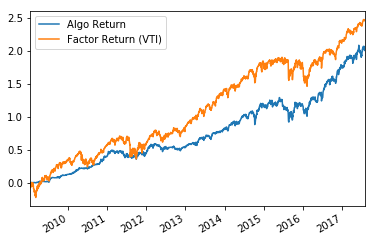

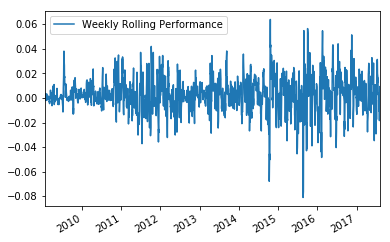

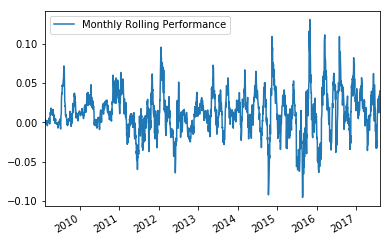

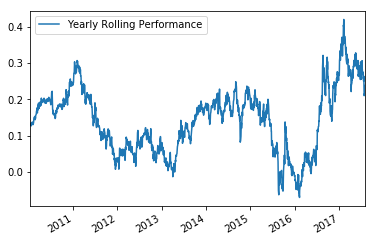

EW 598 26
IS 0.36299186557578617 0.5622022233986236 0.15556036133902662 0.1044736586693145
OOS 1.0012515270009694 0.5436507936507936 0.17510005491684688 0.10935500281443275
ATTEMPTING PULL aa034f872c62e162bc7d106eab0883135942b41e14afe475c0f648ef
Weekly -0.0761664043163 0.00301046685088 0.0769232220696
Monthly -0.10630277648 0.0133908367604 0.12617247807
Yearly -0.0997712518404 0.158083838045 0.34441578105


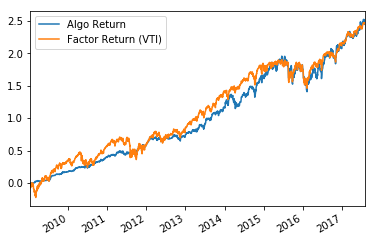

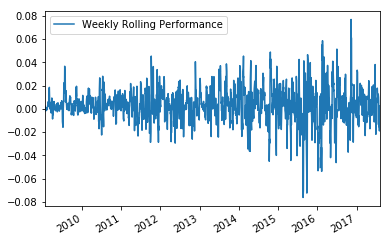

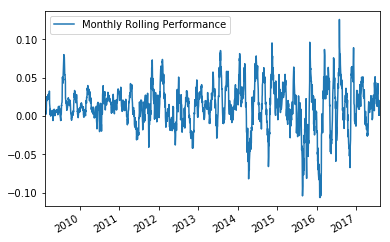

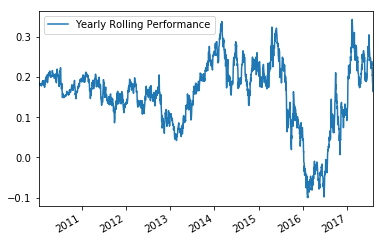

HRP FULL 598 26
IS 0.3934047317994578 0.5452981651376146 0.12428043923019083 0.08820700643287065
OOS 0.8770990151703607 0.5515873015873016 0.14131593602077297 0.0836437940304591
ATTEMPTING PULL da350ed76ed13a74741b58ba5aff58216ea16daffb2d74611c3555cf
Weekly -0.0710761675003 0.00243213322869 0.0507881424648
Monthly -0.084936768242 0.0108304254812 0.10592291871
Yearly -0.0828172455922 0.128341281077 0.296145457668


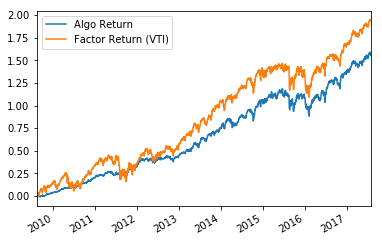

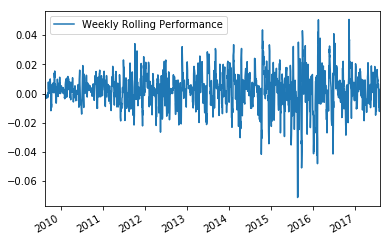

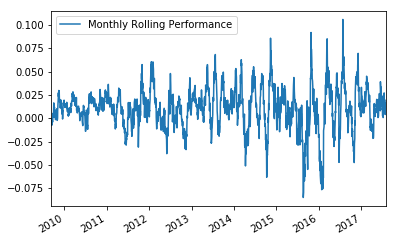

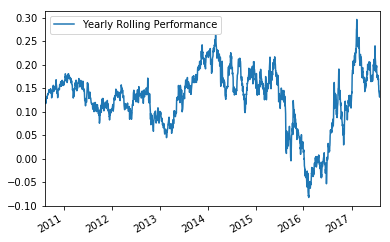

HRP FULL 198 8
IS 0.36210337296496414 0.5412844036697247 0.12087701511884608 0.09352211185402343
OOS 0.8978590417995098 0.5753968253968254 0.21466428898032963 0.10088453858053985
ATTEMPTING PULL e10bd95b9a3f03a6c005ee8e6ebba117dd04a901483569d2e2d4390c
Weekly -0.0773819386701 0.00254149440175 0.0552772633515
Monthly -0.0894844512686 0.0113179584509 0.116073656996
Yearly -0.0707079754437 0.130995389635 0.372610283537


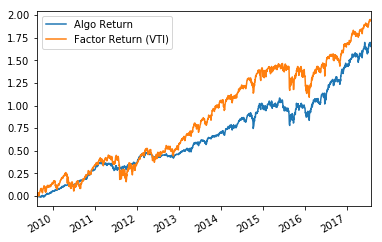

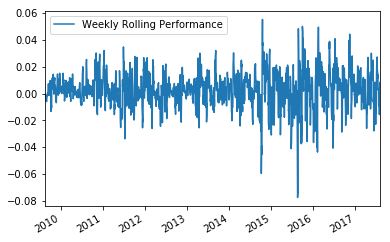

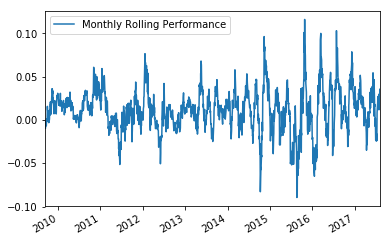

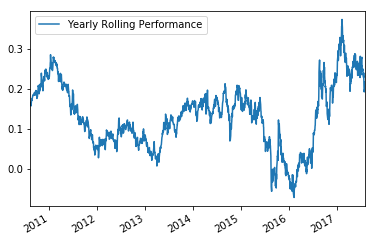

EW By Ticker 198 8
IS 0.3031926925108377 0.5399682371625198 0.11239517305147473 0.07760721245001077
OOS 0.6992542802237477 0.5476190476190477 0.12806079684785443 0.06952277704576959
ATTEMPTING PULL efaef5c0b4cc188695b062bb83201100ef8f3d357e6366e83e3a50ed
Weekly -0.046544188939 0.00219749544126 0.0488436163396
Monthly -0.0503040295624 0.00972212699942 0.080771168691
Yearly -0.0471951489434 0.106776643765 0.259796409326


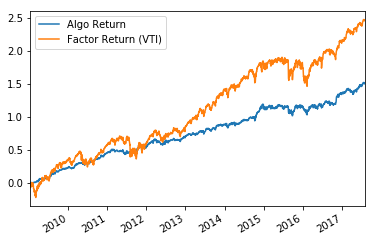

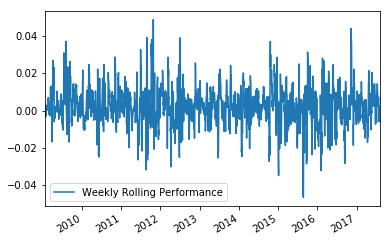

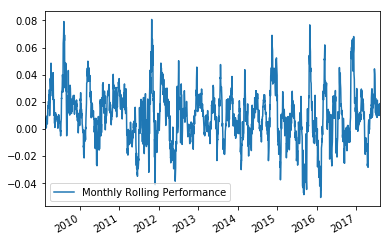

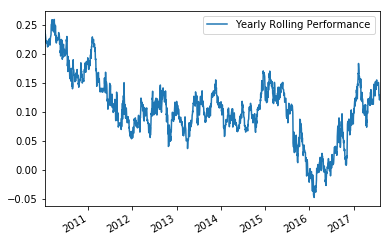

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline
for mod in cleanedModels:
    try:
        print(mod["portfolioType"], mod['ALGORITHMS TRADED'], len(mod['tickers']))
        print("IS", mod["IS_beta"], mod["IS_profitability"], mod["IS_annualizedReturn"], mod["IS_annualizedVolatility"])
        print("OOS", mod["OOS_beta"], mod["OOS_profitability"], mod["OOS_annualizedReturn"], mod["OOS_annualizedVolatility"])
        tickerAllocationsTable, historicalWeights, historicalPredictions = getDiscoveredPortfolioData(mod["key"])
        algoPerformance, algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly = getLimitedDataForPortfolio(tickerAllocationsTable, joinedData)
        empyrical.cum_returns(algoPerformance).plot()
        algoPerformanceRollingWeekly.plot()
        print("Weekly", algoPerformanceRollingWeekly.min().values[0], algoPerformanceRollingWeekly.mean().values[0], algoPerformanceRollingWeekly.max().values[0])

        algoPerformanceRollingMonthly.plot()
        print("Monthly", algoPerformanceRollingMonthly.min().values[0], algoPerformanceRollingMonthly.mean().values[0], algoPerformanceRollingMonthly.max().values[0])

        algoPerformanceRollingYearly.plot()
        print("Yearly", algoPerformanceRollingYearly.min().values[0], algoPerformanceRollingYearly.mean().values[0], algoPerformanceRollingYearly.max().values[0])

        plt.show()
        plt.draw()
    except:
        continue